In [1]:
import tables
import numpy as np
import matplotlib.pyplot as plt
file = tables.open_file('updraft_objects_20190227.mat')
file2 = tables.open_file('updraft_wnorm_20190227.mat')

In [2]:
CWIDTH = np.squeeze(file.root.CWIDTH[:])[:-1]
CWIDTH2 = np.squeeze(file.root.CWIDTH2[:])[:-1]
cwidth = np.concatenate((CWIDTH,CWIDTH2))

upZi = np.squeeze(file.root.upZi[:])
upZi2 = np.squeeze(file.root.upZi2[:])
Zi = np.concatenate((upZi,upZi2))

uparea = file.root.uparea[:]
uparea2 = file.root.uparea2[:]

upctime = file.root.upctime[:]
upctime2 = file.root.upctime2[:]

upspd = np.squeeze(file.root.upspd[:])[:-1]
upspd2 = np.squeeze(file.root.upspd2[:])[:-1]
uwind = np.concatenate((upspd,upspd2))

chordlength = CWIDTH*upspd
chordlength2 = CWIDTH2*upspd2


upwmax  = np.squeeze(file.root.upwmax[:])
upwmax2 = np.squeeze(file.root.upwmax2[:])
max_w = np.concatenate((upwmax,upwmax2))

upwmax_top = np.squeeze(file.root.upwmax_top[:])
upwmax_top2 = np.squeeze(file.root.upwmax_top2[:])
max_wtop = np.concatenate((upwmax_top,upwmax_top2))

upwmean = np.squeeze(file.root.upwmean[:])
upwmean2 = np.squeeze(file.root.upwmean2[:])

upwstar = np.squeeze(file.root.upwstar[:])
upwstar2 = np.squeeze(file.root.upwstar[:])

upxc = np.squeeze(file.root.upxc[:])
upxc2 = np.squeeze(file.root.upxc2[:])

upzbot = np.squeeze(file.root.upzbot[:]) 
upzbot2 = np.squeeze(file.root.upzbot2[:])

upzc = np.squeeze(file.root.upzc[:])
upzc2 = np.squeeze(file.root.upzc2[:])

upzx = np.squeeze(file.root.upzx[:])
upzx2 = np.squeeze(file.root.upzx2[:])

xideal = np.squeeze(file.root.xideal[:])
ximat = np.squeeze(file.root.ximat[:])

z34 = np.squeeze(file.root.z34[:])
z342 = np.squeeze(file.root.z342[:])

zideal = np.squeeze(file.root.zideal[:])
zimat = np.squeeze(file.root.zimat[:])

In [3]:
upz_norm=(0.5*(upzc+upzx))/upZi
upzxn=upzx/upZi

upz_norm2=(0.5*(upzc2+upzx2))/upZi2
upzxn2=upzx2/upZi2

updnorm=(upzx-upzbot)/upZi
updnorm2=(upzx2-upzbot2)/upZi2

upzbot_norm=upzbot/upZi
upzbot_norm2=upzbot2/upZi2


upzx_norm=upzx/upZi
upzx_norm2=upzx2/upZi2

idx=[]
idx2=[]
qtiles=[.25,.45,.65,.85,1.05,1.25]
qtiles=np.asarray(qtiles)

# qtiles=np.arange(.1,1.3,.1)
# print(qtiles)
# qtiles=np.asarray(qtiles)

for ii in range(len(qtiles)-1):
    idx.append(np.where((upz_norm>=qtiles[ii])&(upz_norm<qtiles[ii+1])))
    idx2.append(np.where((upz_norm2>=qtiles[ii])&(upz_norm2<qtiles[ii+1])))

/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater_equal
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater_equal
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


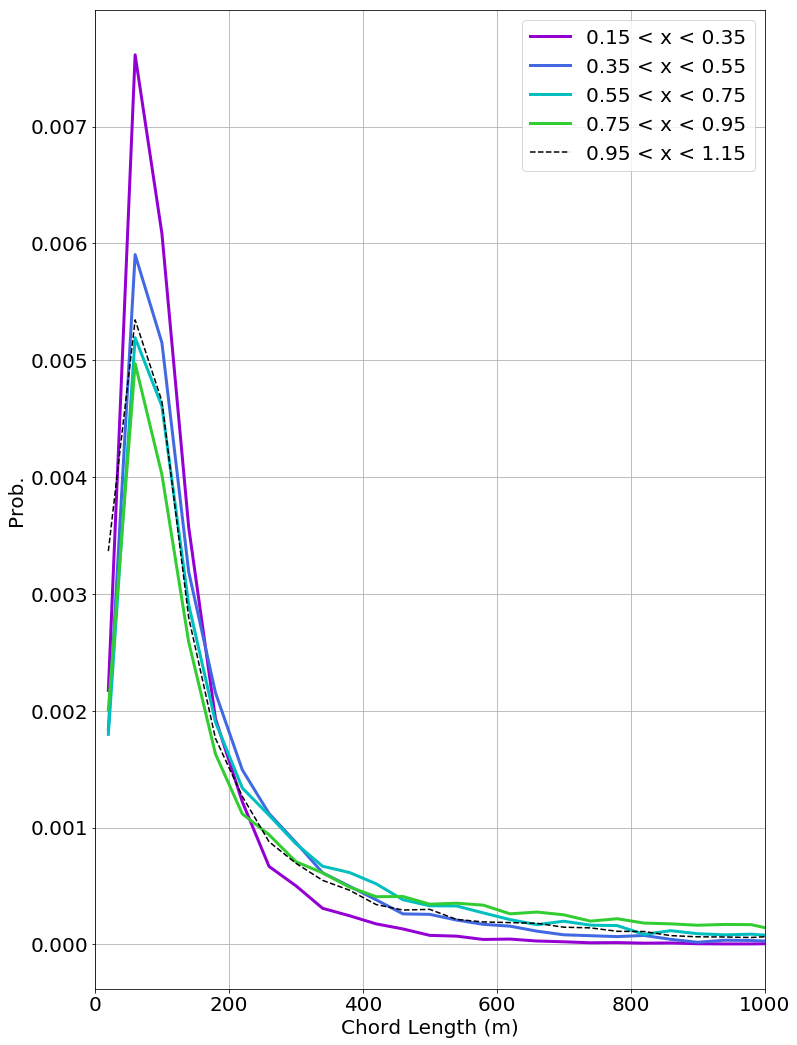

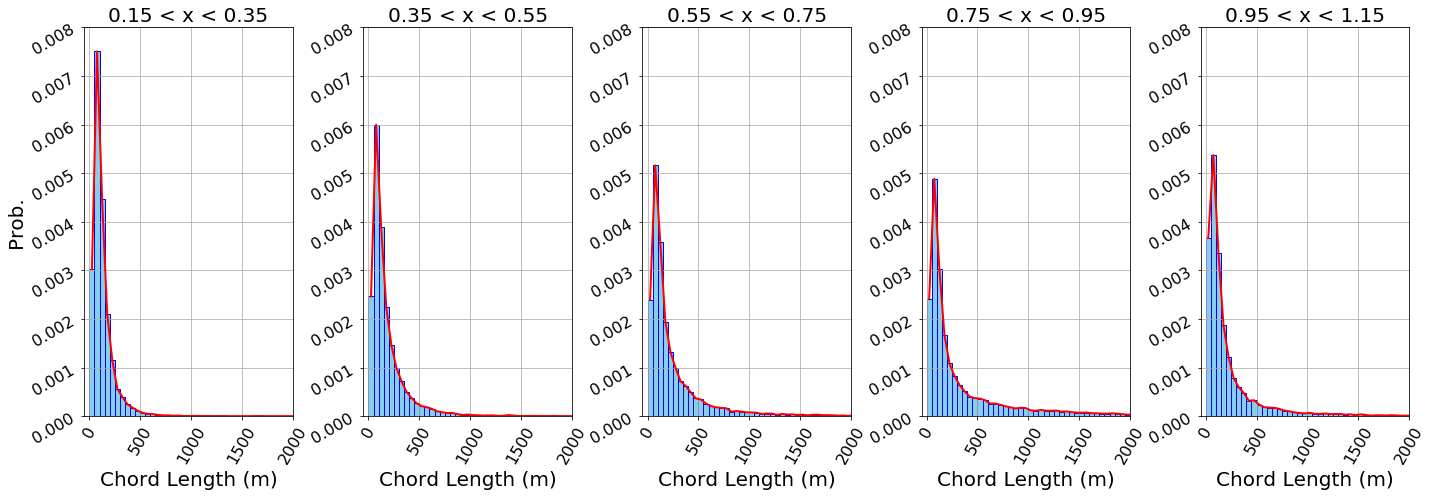

In [11]:
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.special import factorial
import matplotlib.cm as cm

plt.figure(figsize=(12,18))
cl=[]
cl2=[]
colors= ['darkviolet', 'royalblue','c','limegreen']

for i in range(len(qtiles)-1):
    if i == 4:
        cl = chordlength[idx[i]]
        cl2 = chordlength2[idx2[i]]
        nbins = 50
        chord = np.concatenate((cl,cl2))
        n, bins = np.histogram(chord,bins=50,range=(0,2000),density=1)
        pdfx = np.zeros(n.size)
        pdfy = np.zeros(n.size)
        for k in range(n.size):
            pdfx[k] = 0.5*(bins[k]+bins[k+1])
            pdfy[k] = n[k]


        plt.plot(pdfx, pdfy,color='k',ls='--',label='%.2f < x < %.2f' % (qtiles[i]-.1,qtiles[i]+.1))
    else:
        cl = chordlength[idx[i]]
        cl2 = chordlength2[idx2[i]]
        nbins = 50
        chord = np.concatenate((cl,cl2))
        n, bins = np.histogram(chord,bins=50,range=(0,2000),density=1)
        pdfx = np.zeros(n.size)
        pdfy = np.zeros(n.size)
        for k in range(n.size):
            pdfx[k] = 0.5*(bins[k]+bins[k+1])
            pdfy[k] = n[k]

        plt.plot(pdfx, pdfy,color=colors[i],lw=3,label='%.2f < x < %.2f' % (qtiles[i]-.1,qtiles[i]+.1))
            
plt.grid()
# plt.xlim(-100,2000)
plt.xlim(0,1000)
plt.legend(fontsize=20)
plt.xlabel('Chord Length (m)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Prob.',fontsize=20)
plt.savefig('powerpoint_plots/overlayed_pdfs_5_chord_length_zoom.png')


plt.figure(figsize=(20,7))

for i in range(len(qtiles)-1):
    plt.subplot(1,5,i+1)
    cl = chordlength[idx[i]]
    cl2 = chordlength2[idx2[i]]
    nbins = 50
    chord = np.concatenate((cl,cl2))
    plt.hist(chord,bins=50,range=(0,2500),density=1,facecolor='skyblue',edgecolor='blue')
    n, bins = np.histogram(chord,bins=50,range=(0,2500),density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    plt.title('%.2f < x < %.2f' % (qtiles[i]-.1,qtiles[i]+.1),fontsize=20)
    plt.plot(pdfx, pdfy,color='r',lw=2)
    plt.xticks(fontsize=16,rotation=60)
    plt.yticks(fontsize=16,rotation=30)

    plt.xlabel('Chord Length (m)', fontsize=20)
    plt.xlim(-50,2000)
    plt.ylim(0,0.008)
    plt.grid()
    if i == 0:
        plt.ylabel('Prob.',fontsize=20)
        
    

plt.tight_layout(w_pad=0)
plt.savefig('powerpoint_plots/histograms_5_chord_length.png')

In [5]:
bot= np.where((upz_norm>=0.3)&(upz_norm<0.4))
bot2= np.where((upz_norm2>=0.3)&(upz_norm2<0.4))
top= np.where((upz_norm>=0.7)&(upz_norm<0.8))
top2= np.where((upz_norm2>=0.7)&(upz_norm2<0.8))


top_chord = chordlength[top]
top_chord2 = chordlength2[top2]

bot_chord = chordlength[bot]
bot_chord2 = chordlength2[bot2]

nbins = 50
chord_top = np.concatenate((top_chord,top_chord2))
# chord_top = chord_top[~np.isnan(chord_top)]
chord_bot = np.concatenate((bot_chord,bot_chord2))
# chord_bot = chord_bot[~np.isnan(chord_bot)]

# plt.figure(figsize=(15,12))
# plt.subplot(121)
# plt.title('0.7*Zi < x < 0.8*Zi',fontsize=16)
# plt.hist(chord_top,bins=nbins,range=(min(chord_top),max(chord_top)),density=1,facecolor='skyblue',edgecolor='blue',label='%i' % nbins)
# n, bins = np.histogram(chord_top,bins='auto',range=(min(chord_top),max(chord_top)),density=1)
# pdfx = np.zeros(n.size)
# pdfy = np.zeros(n.size)
# for k in range(n.size):
#     pdfx[k] = 0.5*(bins[k]+bins[k+1])
#     pdfy[k] = n[k]
# plt.plot(pdfx, pdfy,color='r',lw=2,ls='--',label='%i' % (len(bins)))
# plt.grid()
# plt.legend(fontsize=14)
# plt.xlabel('Chord Length (m)', fontsize=14)

# plt.subplot(122)
# plt.title('0.3*Zi < x < 0.4*Zi',fontsize=16)
# plt.hist(chord_bot,bins=nbins,range=(min(chord_bot),max(chord_bot)),density=1,facecolor='skyblue',edgecolor='blue',label='%i' % nbins)
# n, bins = np.histogram(chord_bot,bins='auto',range=(min(chord_bot),max(chord_bot)),density=1)
# pdfx = np.zeros(n.size)
# pdfy = np.zeros(n.size)
# for k in range(n.size):
#     pdfx[k] = 0.5*(bins[k]+bins[k+1])
#     pdfy[k] = n[k]
# plt.plot(pdfx, pdfy,color='r',lw=2,ls='--',label='%i' % (len(bins)))
# plt.grid()
# plt.legend(fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.xlabel('Chord Length (m)', fontsize=14)
# plt.savefig('powerpoint_plots/upper_and_lower_chordlength')

/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value e

In [6]:
# plt.figure(figsize=(10,10))
# n, bins = np.histogram(chord_top,bins='auto',range=(min(chord_top),max(chord_top)),density=1)
# pdfx = np.zeros(n.size)
# pdfy = np.zeros(n.size)
# for k in range(n.size):
#     pdfx[k] = 0.5*(bins[k]+bins[k+1])
#     pdfy[k] = n[k]
# plt.plot(pdfx, pdfy,lw=2,label='0.7*Zi < x < 0.8*Zi')

# n, bins = np.histogram(chord_bot,bins='auto',range=(min(chord_bot),max(chord_bot)),density=1)
# pdfx = np.zeros(n.size)
# pdfy = np.zeros(n.size)
# for k in range(n.size):
#     pdfx[k] = 0.5*(bins[k]+bins[k+1])
#     pdfy[k] = n[k]
# plt.plot(pdfx, pdfy,lw=2,label='0.3*Zi < x < 0.4*Zi')
# plt.legend(fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.grid()
# plt.xlim(-10,2000)
# plt.xlabel('Chord Length (m)',fontsize=14)
# plt.savefig('powerpoint_plots/upper_and_lower_chordlength_overlayed')
# plt.show()

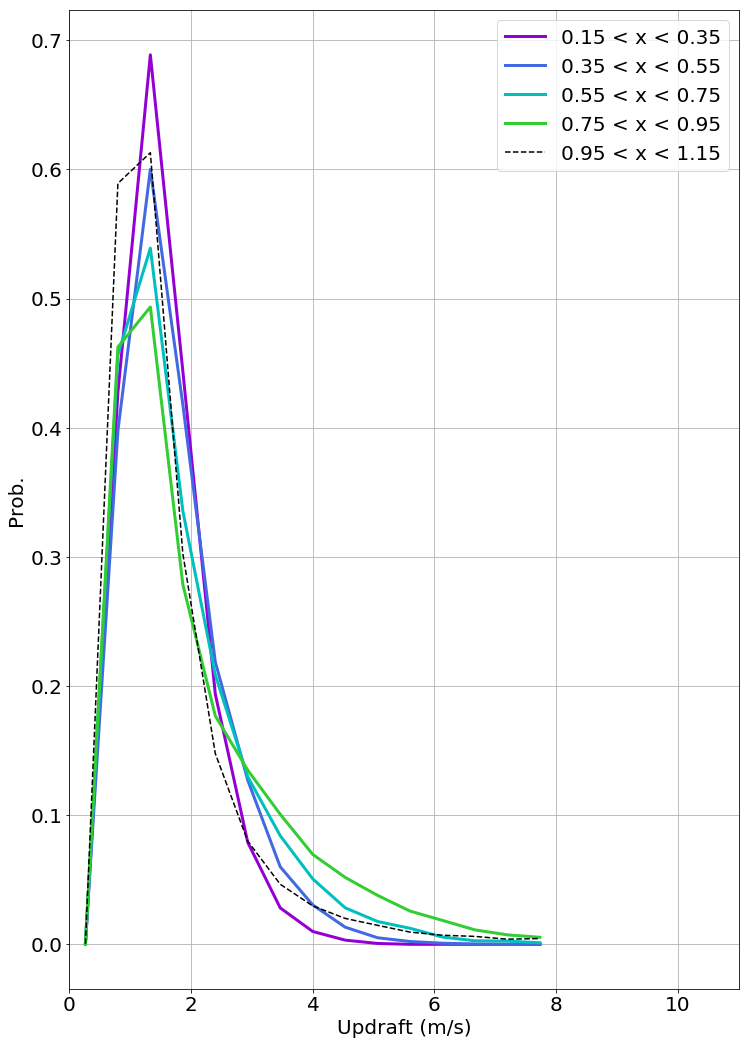

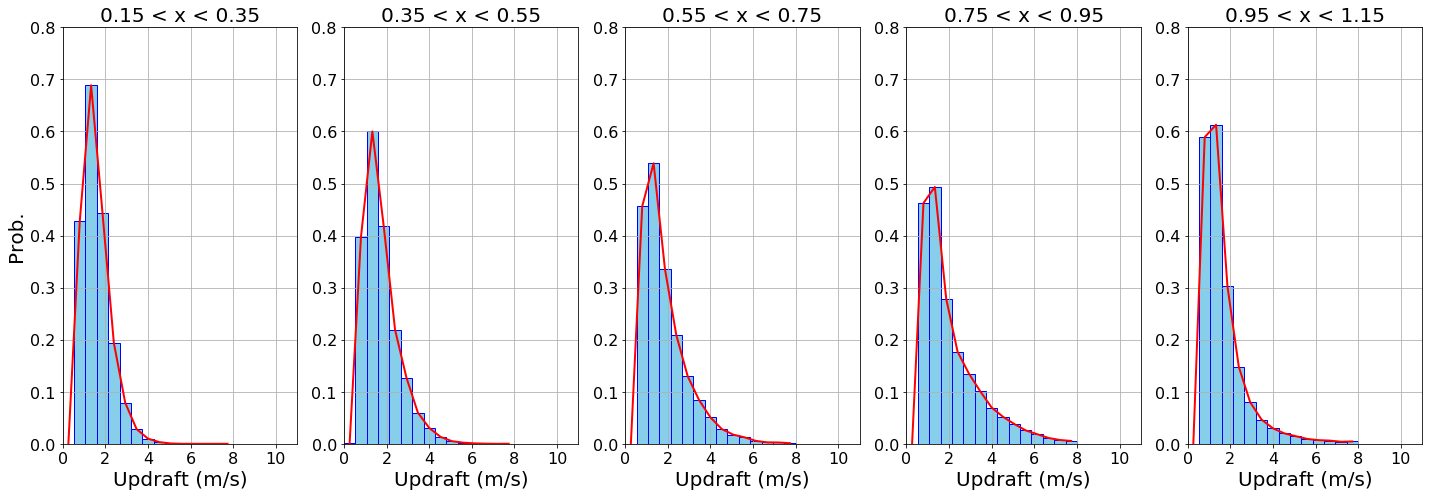

In [7]:
plt.figure(figsize=(12,18))
cl=[]
cl2=[]
# colors = cm.rainbow(np.linspace(0, 1, len(qtiles)-1))
colors= ['darkviolet', 'royalblue','c','limegreen']

for i in range(len(qtiles)-1):
    if i == 4:
        w = upwmax_top[idx[i]]
        w2 = upwmax_top2[idx2[i]]
        nbins = 50
        updraft = np.concatenate((w,w2))
        n, bins = np.histogram(updraft,bins=15,range=(0,8),density=1)
        pdfx = np.zeros(n.size)
        pdfy = np.zeros(n.size)
        for k in range(n.size):
            pdfx[k] = 0.5*(bins[k]+bins[k+1])
            pdfy[k] = n[k]


        plt.plot(pdfx, pdfy,color='k',ls='--',label='%.2f < x < %.2f' % (qtiles[i]-.1,qtiles[i]+.1))
        
    else:
        w = upwmax_top[idx[i]]
        w2 = upwmax_top2[idx2[i]]
        nbins = 50
        updraft = np.concatenate((w,w2))
        n, bins = np.histogram(updraft,bins=15,range=(0,8),density=1)
        pdfx = np.zeros(n.size)
        pdfy = np.zeros(n.size)
        for k in range(n.size):
            pdfx[k] = 0.5*(bins[k]+bins[k+1])
            pdfy[k] = n[k]


        plt.plot(pdfx, pdfy,color=colors[i],lw=3,label='%.2f < x < %.2f' % (qtiles[i]-.1,qtiles[i]+.1))


        
plt.grid()
plt.legend(fontsize=20)
plt.xlabel('Updraft (m/s)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Prob.',fontsize=20)
plt.xlim(0,11)
plt.savefig('powerpoint_plots/overlayed_pdfs_5_updraft.png')

plt.figure(figsize=(20,7))

for i in range(len(qtiles)-1):
    plt.subplot(1,5,i+1)
    w = upwmax_top[idx[i]]
    w2 = upwmax_top2[idx2[i]]
    nbins = 15
    updraft = np.concatenate((w,w2))
    plt.hist(updraft,bins=nbins,range=(0,8),density=1,facecolor='skyblue',edgecolor='blue')
    n, bins = np.histogram(updraft,bins=15,range=(0,8),density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    plt.title('%.2f < x < %.2f' % (qtiles[i]-.1,qtiles[i]+.1),fontsize=20)
    plt.plot(pdfx, pdfy,color='r',lw=2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Updraft (m/s)', fontsize=20)
    plt.xlim(0,11)
    plt.ylim(0,0.8)
    plt.grid()
    if i == 0:
        plt.ylabel('Prob.',fontsize=20)


plt.tight_layout()
plt.savefig('powerpoint_plots/histograms_5_updraft.png')

/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater_equal
  
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_la

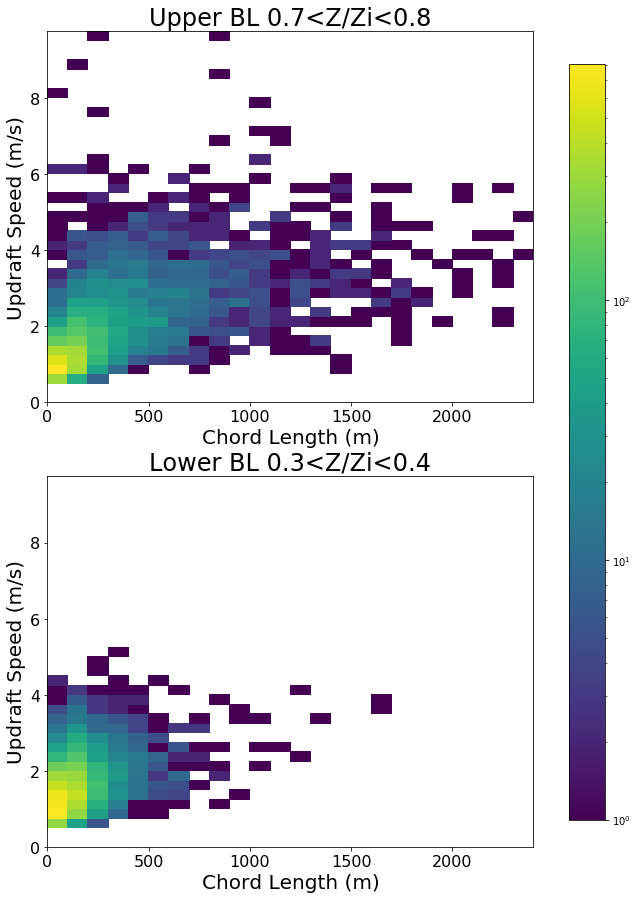

In [13]:
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm

bot= np.where((upz_norm>=0.3)&(upz_norm<0.4))
bot2= np.where((upz_norm2>=0.3)&(upz_norm2<0.4))
top= np.where((upz_norm>=0.7)&(upz_norm<0.8))
top2= np.where((upz_norm2>=0.7)&(upz_norm2<0.8))


top_w = upwmax_top[top]
top_w2 = upwmax_top2[top2]

bot_w = upwmax_top[bot]
bot_w2 = upwmax_top2[bot2]

w_top = np.concatenate((top_w,top_w2))
# w_top = w_top[~np.isnan(w_top)]
# w_top_ = w_top[:6361]
w_bot = np.concatenate((bot_w,bot_w2))
# w_bot = w_bot[~np.isnan(w_bot)]


fig, axs = plt.subplots(2,1,figsize=(10,15))
print(axs)
h = plt.hist2d(chord_bot,w_bot,bins=[np.arange(0,2500,100),np.arange(0,10,0.25)], norm=LogNorm())
plt.title('Lower BL 0.3<Z/Zi<0.4',fontsize=24)
plt.xlabel('Chord Length (m)',fontsize=20)
plt.ylabel('Updraft Speed (m/s)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(211)
h = plt.hist2d(chord_top,w_top,bins=[np.arange(0,2500,100),np.arange(0,10,0.25)], norm=LogNorm())
plt.title('Upper BL 0.7<Z/Zi<0.8',fontsize=24)
plt.xlabel('Chord Length (m)',fontsize=20)
plt.ylabel('Updraft Speed (m/s)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# trend = np.polyfit(chord_top,w_top_, deg=1)
# trendpoly = np.poly1d(trend)
# plt.plot(chord_top, trendpoly(chord_top))
# print(trendpoly(chord_top))
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(h[3], cax=cbar_ax,shrink=0.6)
plt.savefig('powerpoint_plots/histogram_2D.png')
plt.show()

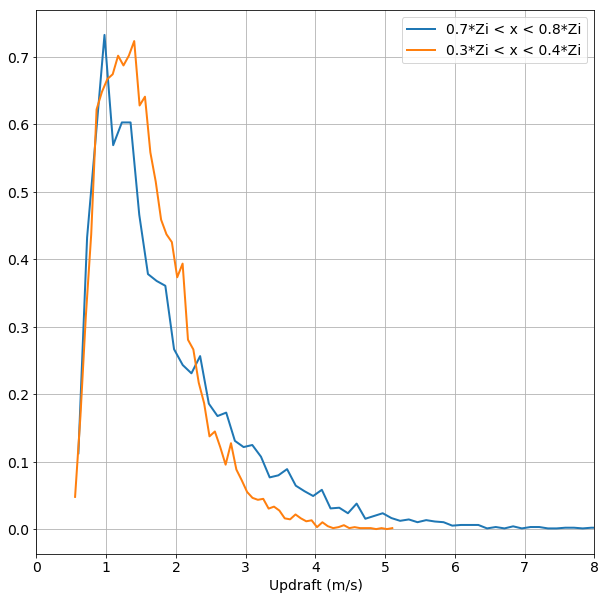

In [9]:
# plt.figure(figsize=(15,12))
# plt.subplot(121)
# plt.title('0.7*Zi < x < 0.8*Zi',fontsize=16)
# plt.hist(w_top,bins=nbins,range=(min(w_top),max(w_top)),density=1,facecolor='skyblue',edgecolor='blue',label='%i' % nbins)
# n, bins = np.histogram(w_top,bins='auto',range=(min(w_top),max(w_top)),density=1)
# pdfx = np.zeros(n.size)
# pdfy = np.zeros(n.size)
# for k in range(n.size):
#     pdfx[k] = 0.5*(bins[k]+bins[k+1])
#     pdfy[k] = n[k]
# plt.plot(pdfx, pdfy,color='r',lw=2,ls='--',label='%i' % (len(bins)))
# plt.grid()
# plt.legend(fontsize=14)
# plt.xlim(0,11)
# plt.xlabel('Updraft (m/s)', fontsize=14)

# plt.subplot(122)
# plt.title('0.3*Zi < x < 0.4*Zi',fontsize=16)
# plt.hist(w_bot,bins=nbins,range=(min(w_bot),max(w_bot)),density=1,facecolor='skyblue',edgecolor='blue',label='%i' % nbins)
# n, bins = np.histogram(w_bot,bins='auto',range=(min(w_bot),max(w_bot)),density=1)
# pdfx = np.zeros(n.size)
# pdfy = np.zeros(n.size)
# for k in range(n.size):
#     pdfx[k] = 0.5*(bins[k]+bins[k+1])
#     pdfy[k] = n[k]
# plt.plot(pdfx, pdfy,color='r',lw=2,ls='--',label='%i' % (len(bins)))
# plt.grid()
# plt.legend(fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.xlabel('Updraft (m/s)', fontsize=14)
# plt.xlim(0,11)
# plt.savefig('powerpoint_plots/upper_and_lower_updraft')

plt.figure(figsize=(10,10))
n, bins = np.histogram(w_top,bins='auto',range=(min(w_top),max(w_top)),density=1)
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]
plt.plot(pdfx, pdfy,lw=2,label='0.7*Zi < x < 0.8*Zi')

n, bins = np.histogram(w_bot,bins='auto',range=(min(w_bot),max(w_bot)),density=1)
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]
plt.plot(pdfx, pdfy,lw=2,label='0.3*Zi < x < 0.4*Zi')
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.xlim(0,8)
plt.xlabel('Updraft (m/s)', fontsize=14)
plt.savefig('powerpoint_plots/upper_and_lower_updraft_overlayed')
plt.show()